# 1 数据说明

## 1.1 数据表表述

table1_user 训练集中应聘者的信息

table2_jd 训练集中工作的信息

table3_action 训练集中用户对工作的行为

test_user 测试集中的应聘者信息

test_action 测试集中应聘者行为

## 1.2 数据表中字段说明

### 1.2.1 train_user

<table>
<tr><td>user_id</td><td>用户标识</td><td>object</td>
<tr><td>live_city_id</td><td>现居住城市</td><td>int16</td>
<tr><td>desire_jd_city_id</td><td>期望工作城市</td><td>object</td>
<tr><td>desire_jd_industry_id</td><td>期望工作行业</td><td>object</td>
<tr><td>desire_jd_type_id</td><td>期望工作职类</td><td>object</td>
<tr><td>desire_jd_salary_id</td><td>期望薪水</td><td>object</td>
<tr><td>cur_industry_id</td><td>最近工作行业</td><td>object</td>
<tr><td>cur_jd_type</td><td>最近工作职类</td><td>object</td>
<tr><td>cur_salary_id</td><td>最近薪水</td><td>object</td>
<tr><td>cur_degree_id</td><td>学历</td><td>object</td>
<tr><td>birthday</td><td>年龄（虚拟年龄）</td><td>int16</td>
<tr><td>start_work_date</td><td>开始工作日期</td><td>object</td>
<tr><td>experience</td><td>经验</td><td>object</td>
</table>

### 1.2.2 train_job

<table>
<tr><td>jd_no</td><td>职位代码</td><td>object</td>
<tr><td>jd_title</td><td>职位标题</td><td>object</td>
<tr><td>company_name</td><td>公司（所有行均为空）</td><td>object</td>
<tr><td>city</td><td>城市</td><td>int16</td>
<tr><td>jd_sub_type</td><td>职位子类</td><td>object</td>
<tr><td>require_nums</td><td>需求人数</td><td>int16</td>
<tr><td>max_salary</td><td>最高月薪</td><td>object</td>
<tr><td>min_salary</td><td>最低月薪</td><td>object</td>
<tr><td>start_date</td><td>开始日期</td><td>object</td>
<tr><td>end_date</td><td>结束日期</td><td>object</td>
<tr><td>is_travel</td><td>是否要出差</td><td>int16</td>
<tr><td>min_years</td><td>工作年限</td><td>int16</td>
<tr><td>key</td><td>关键字</td><td>object</td>
<tr><td>min_edu_level</td><td>最低学历</td><td>object</td>
<tr><td>max_edu_level</td><td>最高学历</td><td>object</td>
<tr><td>is_mangerial</td><td>是否要求管理经验</td><td>object</td>
<tr><td>resume_language_required</td><td>语言需求</td><td>object</td>
<tr><td>job_description</td><td>职位描述</td><td>object</td>
</table>

### 1.2.3 train_action

<table>
<tr><td>user_id</td><td>用户标示</td><td>object</td>
<tr><td>jd_no</td><td>职位代码</td><td>object</td>
<tr><td>browsed</td><td>是否浏览</td><td>int16</td>
<tr><td>delivered</td><td>是否投递</td><td>int16</td>
<tr><td>satisfied</td><td>HR是否认可</td><td>int16</td>
</table>


## 1.3 数据集关系

In [3]:
#Load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

data_path = '/Users/botaofan/PycharmProjects/tianchi/zhilian/data/'
raw_user_dtype = {'live_city_id': np.int16, 'desire_jd_salary_id': object, 'cur_salary_id': object, 'birthday': np.int16,
                      'start_work_date': object, }
raw_user = pd.read_csv(data_path + 'table1_user', delimiter='\t', error_bad_lines=False, dtype=raw_user_dtype)
#load train_job
raw_job_dtype = {'city': np.int16, 'require_nums': np.int16, 'max_salary': object, 'min_salary': object,
                 'start_date': object, 'end_date': object, 'raw_job': np.int16, 'is_travel': np.int16,
                 'min_years': np.int16, }
raw_job = pd.read_csv(data_path + 'table2_jd', delimiter='\t', error_bad_lines=False, dtype=raw_job_dtype)
#load train_action
raw_action_dtype = {'browsed': np.int16, 'delivered': np.int16, 'satisfied': np.int16}
raw_action = pd.read_csv(data_path + 'table3_action', delimiter='\t', error_bad_lines=False, dtype=raw_action_dtype)
#load test_user
test_user_dtype = {'live_city_id': np.int16, 'desire_jd_salary_id': object, 'cur_salary_id': object, 'birthday': np.int16,
                   'start_work_date': object}
test_user = pd.read_csv(data_path + "user_ToBePredicted", delimiter="\t", error_bad_lines=False, dtype=test_user_dtype)
#load test_action
test_action = pd.read_csv(data_path + "zhaopin_round1_user_exposure_A_20190723.dms", delim_whitespace=True)

Skipping line 173315: expected 18 fields, saw 20



In [11]:
train_user_id = set(raw_user['user_id'])
test_user_id = set(test_user['user_id'])
user_test_not_in_train = test_user_id - train_user_id
print '训练集应聘人数%d, 测试集应聘人数%d，测试集中没有在训练集中出现过的人数%d' %(len(train_user_id), len(test_user_id), len(user_test_not_in_train))
train_job_no = set(raw_job['jd_no'])
test_job_no = set(test_action['jd_no'])
job_test_not_in_train = test_job_no - train_job_no
print '训练集职位数%d, 测试集职位数%d，测试集中没有在训练集中出现过的职位数%d, 占比%f' %(len(train_jd_no), len(test_jd_no), len(jd_test_not_in_train),len(jd_test_not_in_train)/(len(test_jd_no)+0.0))

训练集应聘人数4500, 测试集应聘人数500，测试集中没有在训练集中出现过的人数500
训练集职位数265690, 测试集职位数24544，测试集中没有在训练集中出现过的职位数2003, 占比0.081609


### 1.3.1 应聘者情况

由上面结果可见，测试集中的500名测试者，均未在训练集中出现过，当然，这也是意料之中的。

### 1.3.1 职位情况

训练集中职位由26.6万条，在需要排序的测试机中，由2003条职位没有在训练集中出现过。



# 2 数据探索

## 2.1 train_user 

In [13]:
print "train_user 共有 %d条记录， %d列。" %(raw_user.shape[0], raw_user.shape[1])

train_user 共有 4500条记录， 13列。


In [28]:
# Function to data exploration and deal with missing data
def explory_cate_data(data, col_name, show_min_count=10):
    print 'Dtype of %s is %s and number of categoris is %d' % \
          (col_name, data[col_name].dtype, len(data[col_name].unique()))
    print 'Category of %s are:' % col_name
    cate = data[col_name].unique()
    cate.sort()
    print cate
    print 'Count of every category'
    cate_count = data.groupby(col_name)[[col_name]].count()
    cate_count.columns = ['count']
    cate_count['perc'] = cate_count['count']/(cate_count['count'].sum()+0.0)
    cate_count.sort_values('count', ascending=False, inplace=True)
    print cate_count[cate_count['count'] >= show_min_count]
    return cate_count


### 2.1.1 live_city_id

由结果看，live_city中共有240个城市（其中，由一个应聘者的城市id为0，可能为缺失值），求职者主要集中在几个大城市。


Dtype of live_city_id is int16 and number of categoris is 240
Category of live_city_id are:
[    0   480   530   531   533   534   535   536   538   539   540   542
   545   546   547   548   550   551   552   553   565   566   567   568
   569   570   571   572   573   574   575   576   577   578   579   580
   582   583   584   585   586   587   588   590   592   593   596   599
   600   601   603   604   605   606   608   609   610   611   612   613
   614   615   617   618   619   621   622   625   627   631   632   634
   635   636   637   638   639   640   641   642   643   644   645   646
   647   648   653   654   655   656   657   658   659   660   662   664
   665   666   668   671   672   673   674   675   677   681   682   683
   684   685   688   691   692   694   697   698   699   700   701   702
   703   704   705   706   707   708   709   710   711   713   714   716
   717   718   719   720   721   722   723   724   725   726   727   728
   730   731   732   733   734  

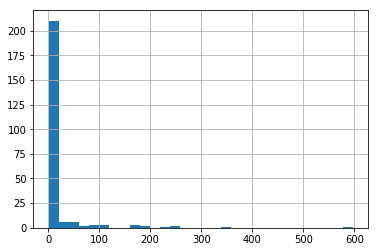

In [29]:
count_result = explory_cate_data(raw_user, 'live_city_id')
count_result['count'].hist(bins =30)

我们来用同样的方式对比一下线上测试集中应聘者的城市分布，可见前三个强城市：530，801，854三个的比例在训练集和测试集中比较相似，这三个可能是北上广？

Dtype of live_city_id is int16 and number of categoris is 86
Category of live_city_id are:
[530 531 538 541 551 565 566 567 569 570 571 572 573 574 575 576 587 588
 599 600 608 613 614 622 624 631 635 636 638 639 640 641 642 643 645 647
 653 657 658 664 665 677 681 682 702 703 704 707 708 714 719 720 721 723
 727 732 736 739 743 749 752 755 763 765 766 768 773 774 779 799 801 807
 808 811 813 822 824 831 854 857 858 864 868 873 886 899]
Count of every category
              count   perc
live_city_id              
530              64  0.128
801              36  0.072
854              35  0.070
538              33  0.066
765              26  0.052
763              26  0.052
531              23  0.046
736              23  0.046
719              17  0.034
565              15  0.030
551              13  0.026
702              12  0.024
599              11  0.022
635              10  0.020


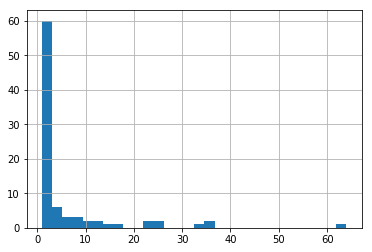

In [30]:
count_result = explory_cate_data(test_user, 'live_city_id')
count_result['count'].hist(bins =30)

###  2.1.2 desire_jd_city_id

由于给特征给了应聘者三个工作地备选项，因此，需要处理，将该特征一分为三。
对于手个desired job city , 只有极少空缺（10个以下），而第二个，第三个，在意料之中的，就有很多了。
在后面的处理中，我们会把 "-" 和 0均用np.nan替换，并且将其他的值的dtype改为np.int16。（由于我们可能用lgb/xgb所以，可能不对nan做过多处理）
显然，desire_jd_city_id可以和前面的live_city_id交叉构造几个特征：
desire_jd_city_id非nan数量，disire_jd_city_id_0/1/2是否和live_city_id 相同，类似的，更要看这几个city是否和job city相同。
另外，根据city本身的属性，可以将city划分为是否热门城市（即大城市或一线、准一线城市），构造相应特征，看能否得出有效信息。

In [32]:
tmp = raw_user['desire_jd_city_id'].str.split(',')
raw_user['desire_jd_city_id_0'] = tmp.apply(lambda x: x[0])
raw_user['desire_jd_city_id_1'] = tmp.apply(lambda x: x[1])
raw_user['desire_jd_city_id_2'] = tmp.apply(lambda x: x[2])

Dtype of desire_jd_city_id_0 is object and number of categoris is 197
Category of desire_jd_city_id_0 are:
['-' '0' '10169' '10185' '103147' '2025' '2566' '2576' '3773' '3809'
 '3927' '3947' '3987' '4367' '4421' '4432' '480' '489' '4974' '5013' '508'
 '5085' '512' '516' '517' '526' '530' '531' '532' '533' '534' '535' '536'
 '537' '538' '539' '540' '541' '542' '543' '544' '545' '546' '547' '548'
 '550' '551' '552' '553' '556' '557' '560' '565' '566' '567' '568' '569'
 '570' '571' '574' '575' '576' '577' '584' '585' '586' '587' '588' '590'
 '592' '596' '599' '600' '601' '606' '611' '612' '613' '614' '615' '617'
 '618' '619' '622' '627' '631' '635' '636' '637' '638' '639' '640' '641'
 '643' '644' '645' '646' '648' '653' '654' '655' '656' '657' '658' '659'
 '662' '664' '665' '672' '673' '674' '681' '682' '683' '685' '687' '688'
 '691' '694' '697' '701' '702' '703' '704' '707' '708' '709' '710' '711'
 '714' '715' '717' '718' '719' '720' '721' '722' '723' '724' '725' '726'
 '727' '731' '732'

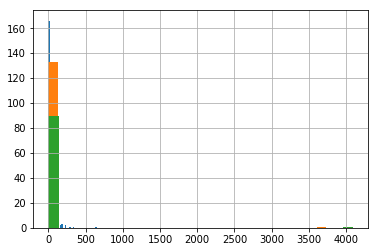

In [33]:
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_0')
count_result['count'].hist(bins =30)
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_1')
count_result['count'].hist(bins =30)
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_2')
count_result['count'].hist(bins =30)